## Análisis exploratorio de los datos del proyecto 
En el siguiente documento se realizará un análisis exploratorio de algunas características de los dataset que nos ayudarán a tener una mejor compresión del caso. Para ello se cuenta tanto con un análisis visual por medio de gráficos, asi como una inspección numérica. Los análisis se enfocaron principalmente en comparar las mismas características tanto en los clientes que aun permanecen en la compañía asi como los que han terminado su contrato.   

Como primer paso, procedemos a importar todas las librerías necesarias para ejecutar la libreta.

In [2]:
# Librerías para importar y visualizar datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploración inicial de datos  
Para comenzar el análisis, leemos los archivos que contienen los datasets y le damos un nombre conveniente. Después, para poder entender la estructura de los datos, imprimimos el método `info()` en cada dataframe. También acompañamos la impresión con una muestra de 5 datos.

In [3]:
# Cargar los datos desde archivos CSV
contracts = pd.read_csv('final_provider/contract.csv')
internet = pd.read_csv('final_provider/internet.csv')
personal = pd.read_csv('final_provider/personal.csv')
phone = pd.read_csv('final_provider/phone.csv')

# Visualizar la información básica y algunas filas de cada DataFrame
print(contracts.info())
display(contracts.sample(5))
print(internet.info())
display(internet.sample(5))
print(personal.info())
display(personal.sample(5))
print(phone.info())
display(phone.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1239,0319-QZTCO,2019-11-01,No,Month-to-month,Yes,Credit card (automatic),58.70,168.6
4632,4760-XOHVN,2019-12-01,2020-01-01 00:00:00,Month-to-month,No,Mailed check,19.45,19.45
4745,6116-RFVHN,2017-04-01,No,Month-to-month,Yes,Electronic check,100.45,3414.65
629,4554-YGZIH,2015-09-01,2019-10-01 00:00:00,Month-to-month,No,Credit card (automatic),90.05,4547.25
4839,3070-DVEYC,2019-05-01,2019-12-01 00:00:00,Month-to-month,No,Mailed check,73.75,545.15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1730,5931-FLJJF,Fiber optic,No,No,No,No,No,No
3457,8652-YHIYU,Fiber optic,No,No,No,Yes,No,No
1965,1032-MAELW,DSL,Yes,Yes,Yes,Yes,No,Yes
1271,6265-SXWBU,Fiber optic,No,Yes,Yes,No,Yes,No
298,9069-LGEUL,DSL,Yes,No,No,No,No,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


,customerID,gender,SeniorCitizen,Partner,Dependents
4722,7581-EBBOU,Female,0,No,No
5240,8777-MBMTS,Female,1,Yes,No
2391,7318-EIVKO,Male,0,No,No
2432,0023-UYUPN,Female,1,Yes,No
302,8266-VBFQL,Male,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None


,customerID,MultipleLines
479,9282-IZGQK,Yes
2101,4706-DGAHW,No
4446,8404-GFGCZ,Yes
1040,2446-ZKVAF,Yes
1807,1960-UYCNN,Yes


Las primeras observaciones que podemos hacer es que no hay presencia de valores ausentes. Los clientes no siempre cuentan con servicio de telefonía e internet, puede tener únicamente un servicio. Todos los dataframe están relacionados por medio de **customerID**. Revisamos el atributo **EnDate** por su relevancia en el proyecto. 

In [4]:
display(contracts[contracts['EndDate'] != 'No'].sample(5))

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
5825,1363-TXLSL,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,70.30,70.3
4405,8417-FMLZI,2019-07-01,2020-01-01 00:00:00,Month-to-month,Yes,Credit card (automatic),83.55,477.55
1458,7893-IXHRQ,2019-11-01,2019-12-01 00:00:00,Month-to-month,No,Electronic check,20.55,20.55
2471,1323-OOEPC,2015-07-01,2019-12-01 00:00:00,Month-to-month,Yes,Credit card (automatic),98.40,5149.5
1395,0471-LVHGK,2016-08-01,2020-01-01 00:00:00,One year,Yes,Electronic check,73.00,3001.2


El atributo **EndDate** es el que nos servirá como referencia de los clientes que han decidido terminar su contrato con la compañía. El atributo tiene como valores la fecha en que el cliente terminó su contrato y No, en caso de que sigan con contrato vigente.  
Lo que sigue es crear una versión condensada de la información que guarde en una sola variable todos los datos del cliente.

In [5]:
# Unir los DataFrames en uno solo
condensado = contracts.merge(internet, on='customerID', how='outer')
condensado = condensado.merge(personal, on='customerID', how='outer')
condensado = condensado.merge(phone, on='customerID', how='outer')

Creamos un nuevo atributo que simplifique esta información con valores 0 si siguen en la compañía y 1 si ya terminaron.

In [6]:
# Crear la columna 'Cancelled' basada en 'EndDate'
condensado['Cancelled'] = (condensado['EndDate'] != 'No').astype(int)

Mostramos como luce la tabla condensada.

In [7]:
display(condensado.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Cancelled
0,0002-ORFBO,2019-05-01,No,One year,Yes,Mailed check,65.6,593.3,DSL,No,...,No,Yes,Yes,No,Female,0,Yes,Yes,No,0
1,0003-MKNFE,2019-05-01,No,Month-to-month,No,Mailed check,59.9,542.4,DSL,No,...,No,No,No,Yes,Male,0,No,No,Yes,0
2,0004-TLHLJ,2019-09-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,73.9,280.85,Fiber optic,No,...,Yes,No,No,No,Male,0,No,No,No,1
3,0011-IGKFF,2018-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Electronic check,98.0,1237.85,Fiber optic,No,...,Yes,No,Yes,Yes,Male,1,Yes,No,No,1
4,0013-EXCHZ,2019-09-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,83.9,267.4,Fiber optic,No,...,No,Yes,Yes,No,Female,1,Yes,No,No,1


### Exploración de datos
A continuación se enlista las características que serán revisadas para poder describir las tendencias de los clientes que abandonan el servicio:  
- ¿Qué porcentaje de los contratos han sido finalizados?
- De forma gráfica, ¿Cuál es el contraste entre los contratos finalizados y los vigentes?, ¿Cuál han sido su tipo de contrato, método de pago, cuánto pagaban al mes, servicio de internet, servicio de telefonía, servicios adicionales, variables demográficas?
- Los que cancelaron: ¿Cuántos tenían ambos servicios?
¿DSL vs fibra óptica?
¿Cuántos tenían múltiples líneas?
¿Cuántos usaban cada servicio adicional?
- Los que aun permanecen: ¿Cuántos tienen ambos servicios?
¿DSL vs fibra óptica?
¿Cuántos tienen múltiples líneas?
¿Cuántos usan cada servicio adicional?

#### ¿Qué porcentaje de los contratos han sido finalizados?
Para conocer la information básica de los que han terminado su contrato, imprimimos el total de clientes, los clientes con contratos terminados y cuál es la proporción que representan del total.

In [8]:
# Análisis de clientes cancelados
cancelados = condensado[condensado['Cancelled'] == 1]
vigentes = condensado[condensado['Cancelled'] == 0]

print("El total de clientes es de:", len(condensado))
print("El total de clientes cancelados es de:", cancelados['Cancelled'].sum())
print("El porcentaje de clientes cancelados es de:", round(cancelados['Cancelled'].sum() / len(condensado) * 100, 2), "%")

El total de clientes es de: 7043
El total de clientes cancelados es de: 1869
El porcentaje de clientes cancelados es de: 26.54 %


El $26.54$% de los clientes han dejado la compañía, esto es casi $1/4$ del total de clientes.  
#### De forma gráfica, ¿Cuál es el contraste entre los contratos finalizados y los vigentes?
Para contestar esta pregunta creamos una visualización de dos conjuntos de gráficas que nos muestra en **azul** (0) los clientes que aun tienen un contrato. En color **naranja** (1) los clientes con contratos cancelados. Se muestran a continuación la suma de clientes para diferentes atributos del dataframe.

/var/folders/z6/8g26l0dx1bq371hn2ggn9d480000gn/T/ipykernel_9774/1797211005.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[5].set_xticklabels(axes[5].get_xticklabels(), rotation=45, ha='right')


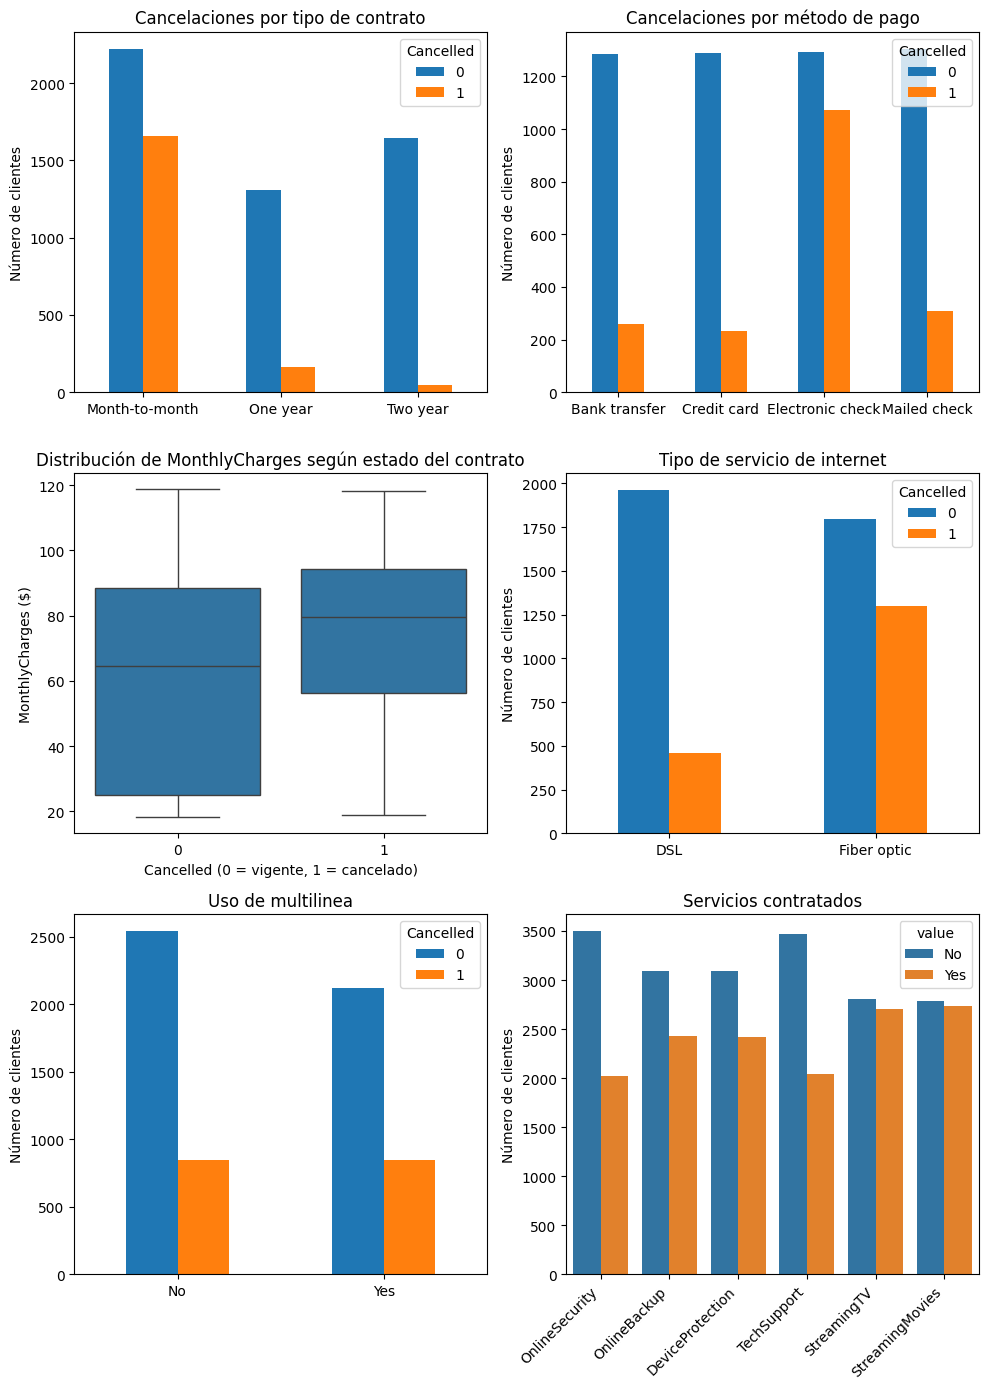

In [9]:
# Creación de gráficos para análisis visual
type = condensado.groupby(by=['Type', 'Cancelled']).size().unstack()
payment = condensado.groupby(by=['PaymentMethod', 'Cancelled']).size().unstack()
payment.index = ['Bank transfer', 'Credit card', 'Electronic check', 'Mailed check']
charge = condensado.groupby(by=[ 'Cancelled','MonthlyCharges']).count()
internetServ = condensado.groupby(by=['InternetService', 'Cancelled']).size().unstack()
multiline = condensado.groupby(by=['MultipleLines', 'Cancelled']).size().unstack()

cols = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

servicios = condensado.melt(
    id_vars='Cancelled',
    value_vars=cols
)

fig, axes = plt.subplots(3, 2, figsize=(10, 14))
axes = axes.flatten()

# Gráfico de barras para cada análisis
# Gráfico 1: Cancelaciones por tipo de contrato
type.plot(kind='bar', ax=axes[0])
axes[0].set_title("Cancelaciones por tipo de contrato")
axes[0].set_xlabel("")
axes[0].set_ylabel("Número de clientes")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Gráfico 2: Cancelaciones por método de pago
payment.plot(kind='bar', ax=axes[1])
axes[1].set_title("Cancelaciones por método de pago")
axes[1].set_xlabel("")
axes[1].set_ylabel("Número de clientes")
axes[1].set_xticklabels(payment.index, rotation=0)

# Gráfico 3: Distribución de MonthlyCharges según estado del contrato
sns.boxplot(data=condensado, x='Cancelled', y='MonthlyCharges', ax=axes[2])
axes[2].set_title("Distribución de MonthlyCharges según estado del contrato")
axes[2].set_xlabel("Cancelled (0 = vigente, 1 = cancelado)")
axes[2].set_ylabel("MonthlyCharges ($)")

# Gráfico 4: Tipo de servicio de internet
internetServ.plot(kind='bar', ax=axes[3])
axes[3].set_title("Tipo de servicio de internet")
axes[3].set_xlabel("")
axes[3].set_ylabel("Número de clientes")
axes[3].set_xticklabels(internetServ.index, rotation=0)

# Gráfico 5: Uso de líneas múltiples
multiline.plot(kind='bar', ax=axes[4])
axes[4].set_title("Uso de multilinea")
axes[4].set_xlabel("")
axes[4].set_ylabel("Número de clientes")
axes[4].set_xticklabels(multiline.index, rotation=0)

# Gráfico 6: Servicios contratados
sns.countplot(data=servicios, x="variable", hue="value")
axes[5].set_title("Servicios contratados")
axes[5].set_xlabel("")
axes[5].set_ylabel("Número de clientes")
axes[5].set_xticklabels(axes[5].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

A continuación se enlistará cual resultaron ser las tendencias de los clientes con contratos cancelados:
- Cancelan mayormente los que pagan mes a mes.
- Cancelan mayormente los que pagan de manera electronica.
- Los que cancelaron suelen pagar en media un poco más que  los que aún tienen un contrato.
- Cancelaron mayormente los que contaban con fibra óptica.
- El número de clientes que canceló es muy similar en cuanto a si tenían multilínea o no.
- En contraste, los clientes que tienen seguridad online y soporte técnico, son más que los que abandonaron la compañía.
- En contraste, los clientes que tienen respaldo online y protección de dispositivos, son ligeramente más que los que abandonaron la compañía.
- En contraste, los clientes que tienen streaming de tv y películas, son casi iguales que los que abandonaron la compañía.

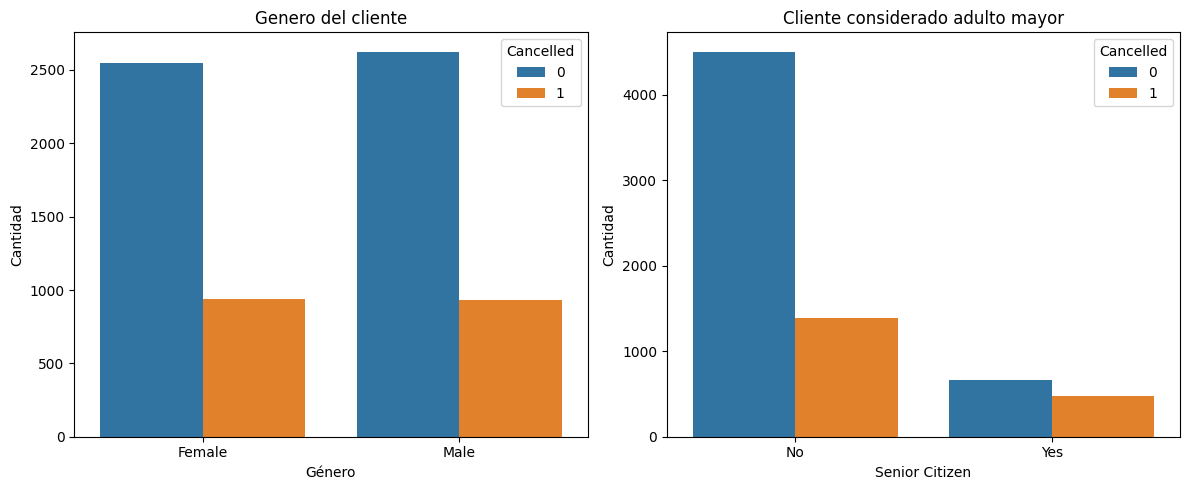

In [10]:
# Análisis de género y edad de los clientes
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(data=condensado, x='gender', hue='Cancelled')
plt.title('Genero del cliente')
plt.xlabel('Género')
plt.ylabel('Cantidad')

plt.subplot(1,2,2)
condensado['SeniorCitizen'] = condensado['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
sns.countplot(data=condensado, x='SeniorCitizen', hue='Cancelled')
plt.title('Cliente considerado adulto mayor')
plt.xlabel('Senior Citizen')
plt.ylabel('Cantidad')
plt.xticks(['No', 'Yes'])

plt.tight_layout()
plt.show()

En cuanto a la comparativa demográfica, el género no es tan relevante en cuanto a si cancelan el servicio o no. Los adultos mayores por su parte, muestran una tendencia un poco mayor a cancelar su contrato.

#### Contraste porcentual entre clientes
Para realizar el contraste global de los clientes, a hora se muestra de forma porcentual cuales son las características de los clientes que hacen la cancelación. Para poder obtener estos valores, dividimos el número de clientes de dicha características entre el número total de clientes registrados en el dataset.  
A pesar de que algunas características no aplican a todos los clientes, se realiza una comparación a nivel global para mostrar que no se trata de atributos aislados o exclusivos de un grupo reducido. Por el contrario, estas características forman parte del panorama general del servicio y pueden influir de manera amplia en la decisión de permanecer o cancelar el contrato.

In [11]:
# Función para imprimir porcentajes
def print_pr(value):
    value.columns = ['Not_Cancelled', 'Cancelled']
    porcentaje = round((value / condensado.shape[0] * 100),2)
    display(porcentaje)

# Análisis detallado de servicios y edad    
tabla_servicios = (servicios.query('value == "Yes"').pivot_table(
            index='variable',         
            columns='Cancelled',       
            aggfunc='size',            
            fill_value=0))

condensado['SeniorCitizen'] = condensado['SeniorCitizen'].map({'No':0, 'Yes':1})
edad = condensado.groupby(by=['SeniorCitizen', 'Cancelled']).size().unstack()

In [12]:
# Imprimir los porcentajes de cada análisis
print_pr(type)
print_pr(payment)
print_pr(multiline)
print_pr(internetServ)
print_pr(tabla_servicios)
print_pr(edad)

,Not_Cancelled,Cancelled
Type,,
Month-to-month,31.52,23.50
One year,18.56,2.36
Two year,23.38,0.68


,Not_Cancelled,Cancelled
Bank transfer,18.26,3.66
Credit card,18.32,3.29
Electronic check,18.37,15.21
Mailed check,18.51,4.37


,Not_Cancelled,Cancelled
MultipleLines,,
No,36.08,12.05
Yes,30.12,12.07


,Not_Cancelled,Cancelled
InternetService,,
DSL,27.86,6.52
Fiber optic,25.54,18.42


,Not_Cancelled,Cancelled
variable,,
DeviceProtection,26.65,7.74
OnlineBackup,27.06,7.43
OnlineSecurity,24.48,4.19
StreamingMovies,27.18,11.61
StreamingTV,26.88,11.56
TechSupport,24.62,4.40


,Not_Cancelled,Cancelled
SeniorCitizen,,
0,64.01,19.78
1,9.46,6.76


In [13]:
print_pr(condensado.groupby(by=['Partner', 'Cancelled']).size().unstack())
print_pr(condensado.groupby(by=['Dependents', 'Cancelled']).size().unstack())
print_pr(condensado.groupby(by=['gender', 'Cancelled']).size().unstack())

,Not_Cancelled,Cancelled
Partner,,
No,34.66,17.04
Yes,38.80,9.50


,Not_Cancelled,Cancelled
Dependents,,
No,48.13,21.91
Yes,25.33,4.63


,Not_Cancelled,Cancelled
gender,,
Female,36.19,13.33
Male,37.27,13.20


De los datos que se pueden apreciar, los que resultan ser de mayor relevancia es el tipo de contrato, el tipo de pago y en menor medida la edad.

### Conclusiones
Tras realizar el análisis exploratorio, se descubrió que la mayoría de las características son categóricas. Las características de mayor peso son el tipo de contrato y la forma de pago. Para poder hacer predicciones consideraremos un desequilibrio de clases en el objetivo. Las demás características, en su mayoría pueden aportar información relevante.

## Preguntas aclaratorias
Para poder obtener un mejor resultado creo pertinente conocer la siguiente información:
- ¿Podemos generar nuevas características (feature engineering), o el análisis debe limitarse a las columnas existentes?
- ¿El modelo entrenado debe ser interpretable o basta con obtener un buen desempeño?
- ¿Es necesario determinar cuales son las características de mayor peso para el abandono del contrato?
- ¿Existe un perfil específico de cliente cuya predicción sea más crítica para la compañía?
- ¿Hay un límite de tiempo de entrenamiento o recursos computacionales que debamos considerar?

## Plan de trabajo
El entrenamiento del modelo consistirá en:
- Implementación de un pipeline para codificación de datos.
- Balanceo de las clases por sobremuestreo y submuestreo para ajustar mejor el entrenamiento.
- Entrenamiento de diferentes modelos con evaluación por medio de validación cruzada.
- Búsqueda de los mejores hiperparámetros para los modelos.
- Visualización del desempeño de los modelos.